# plotting with pandas
A few examples of creating common types of plots using `pandas`' built-in support for `matplotlib`.

## Imports
Import the common modules used for pandas-based data analysis

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Line plots
The default plot type in `pandas` is the line plot.

In [3]:
# make a simple time series with dummy data - we will use random values for each day of the year 2021
ts = pd.Series(np.random.randn(365), index=pd.date_range("1/1/2021", periods=365), name='vals')
ts

2021-01-01   -1.110531
2021-01-02    0.053490
2021-01-03    0.622787
2021-01-04    1.045110
2021-01-05   -2.493182
                ...   
2021-12-27    0.148102
2021-12-28   -1.580472
2021-12-29    0.891702
2021-12-30   -0.040312
2021-12-31   -0.066921
Freq: D, Name: vals, Length: 365, dtype: float64

Create a simple line plot - the index of the Series will be used as the `x` axis, and the values will be plotting on the `y` axis.

<AxesSubplot:>

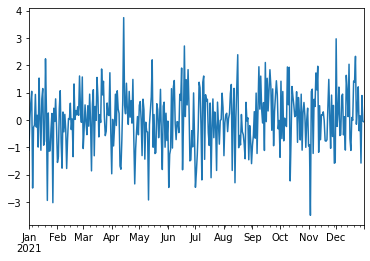

In [4]:
# defaults to line plot
ts.plot()

We can also easily plot the cumulative sum of all prior values at each date.

<AxesSubplot:>

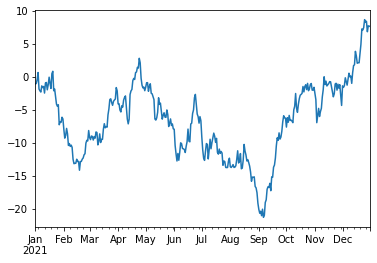

In [5]:
# calculate the cumulative sum of values up to each date
ts = ts.cumsum()
ts.plot()

Let's create a dataframe with this time Series and another one to show how to place two lines on a single plot.

In [6]:
df_ts = pd.DataFrame({
    'first series': ts,
    'second series': np.random.randn(365).cumsum()
    }
)
df_ts.head(3)

,first series,second series
2021-01-01,-1.110531,0.633046
2021-01-02,-1.057041,0.080034
2021-01-03,-0.434254,-0.958282


<AxesSubplot:>

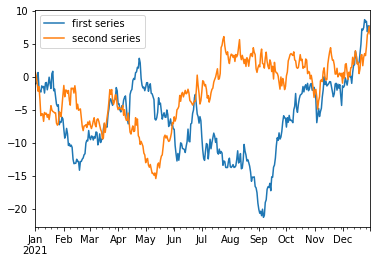

In [7]:
df_ts.plot()

## Bar chart

In [8]:
# create a new index, which places the old index, the dates, into a regular column named 'index'
df = df_ts.reset_index()
df

,index,first series,second series
0,2021-01-01,-1.110531,0.633046
1,2021-01-02,-1.057041,0.080034
2,2021-01-03,-0.434254,-0.958282
3,2021-01-04,0.610856,-2.220793
4,2021-01-05,-1.882326,-1.543329
...,...,...,...
360,2021-12-27,8.367907,4.508713
361,2021-12-28,6.787435,6.330191
362,2021-12-29,7.679138,6.656962
363,2021-12-30,7.638826,7.596769


In [9]:
# rename the 'index' column to 'date'
df.rename(columns = {"index": "date"}, inplace=True)
df

,date,first series,second series
0,2021-01-01,-1.110531,0.633046
1,2021-01-02,-1.057041,0.080034
2,2021-01-03,-0.434254,-0.958282
3,2021-01-04,0.610856,-2.220793
4,2021-01-05,-1.882326,-1.543329
...,...,...,...
360,2021-12-27,8.367907,4.508713
361,2021-12-28,6.787435,6.330191
362,2021-12-29,7.679138,6.656962
363,2021-12-30,7.638826,7.596769


In [10]:
# ensure the dates are in a date data type
df["date"] = df["date"].astype("datetime64")

In [11]:
# add a month field
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
df.sample(5)

,date,first series,second series,month
270,2021-09-28,-5.931171,-0.914989,2021-09
35,2021-02-05,-8.665887,-2.545851,2021-02
168,2021-06-18,-9.885402,-3.641107,2021-06
296,2021-10-24,-1.032098,0.445322,2021-10
193,2021-07-13,-9.319414,-1.748266,2021-07


Group rows by month and calculate the sum of the values in each month

In [12]:
# group rows by month and calculate the sum of the values in each month
g = df.groupby(df['date'].dt.month.rename('month')).agg({'sum'})
g

,first series,second series
,sum,sum
month,,
1,-75.971077,-148.895452
2,-311.103002,-122.898785
3,-217.991972,-185.775413
4,-68.388868,-223.163999
5,-145.764482,-365.988897
6,-257.814275,-103.450686
7,-351.620968,13.048485
8,-428.717140,89.695012


Plot the data in the first series:

<AxesSubplot:xlabel='month', ylabel='first series'>

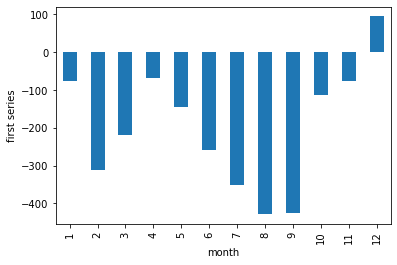

In [13]:
#plot the data in the first series column
g.plot.bar(
    y=['first series'], 
    ylabel='first series', 
    legend=False
) # the index will serve as the x axis, by default

Plot both series in side-by-side bars:

<AxesSubplot:xlabel='month'>

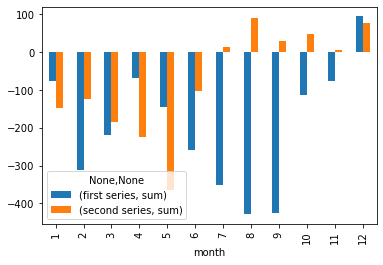

In [14]:
#plot both series in side-by-side bars
g.plot.bar() # the index will serve as the x axis, by default

Plot both series in a stacked bar chart


<AxesSubplot:xlabel='month'>

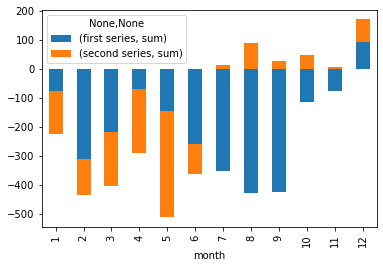

In [15]:
# plot both series in a stacked bar chart
g.plot.bar(stacked=True) # the index will serve as the x axis, by default

## Area chart
Let's show a few details about another chart type - the area chart.

In [16]:
# generate some random data for four columns in a pandas dataframe
df = pd.DataFrame(np.random.rand(10, 4), columns=["foo", "bar", "bum", "baz"])
df.sample(3)

,foo,bar,bum,baz
6,0.097042,0.565605,0.269125,0.609875
8,0.084386,0.922373,0.789733,0.490699
4,0.967625,0.423649,0.144338,0.322360


Plot just a single column:

<AxesSubplot:>

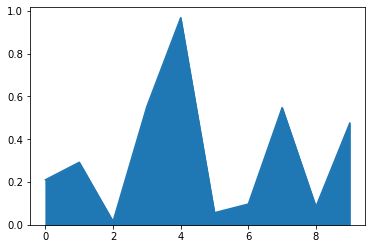

In [17]:
df['foo'].plot.area()

Plot two columns, stacked up on top of each other.

<AxesSubplot:>

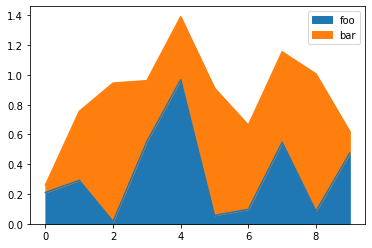

In [18]:
df[ ['foo', 'bar'] ].plot.area()

Plot all columns, stacked up on top of each other.  The default value of the `stacked` argument is `True`, but we include it here anyone just for reference.

<AxesSubplot:xlabel='The label for the x axis', ylabel='The label for the y axis!'>

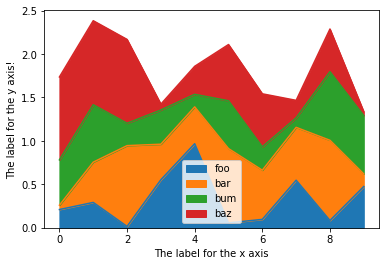

In [19]:
df.plot.area(
    xlabel='The label for the x axis', 
    ylabel='The label for the y axis!', 
    stacked=True
)

## Real data set
We will use the NYC jobs data set, from the NYC Open Data initiative.

In [20]:
# open data about NYC jobs from https://data.cityofnewyork.us/City-Government/NYC-Jobs/kpav-sd4t
df = pd.read_csv('./data/NYC_Jobs.csv')
df.sample(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
1537,518494,HRA/DEPT OF SOCIAL SERVICES,Internal,1,FINANCIAL MANAGEMENT LIAISON,PRINCIPAL ADMINISTRATIVE ASSOC,Competitive-1,10124,01,Constituent Services & Community Programs Comm...,...,**LOAN FORGIVENESS The federal government pro...,APPLICANTS MUST BE PERMANENT IN THE PRINCIPAL ...,Monday â Friday - 9:00AM â 5:00PM,NaN,NaN,New York City residency is generally required ...,02/03/2022,17-FEB-2022,02/03/2022,02/15/2022
377,497126,LAW DEPARTMENT,Internal,1,Budget Analyst,STAFF ANALYST,Competitive-1,12626,02,"Finance, Accounting, & Procurement",...,Additional Information NOTE: This position is ...,Please click on the Apply Now button.,NaN,NaN,NaN,New York City residency is generally required ...,10/28/2021,NaN,11/16/2021,02/15/2022
1790,516521,CONSUMER AFFAIRS,Internal,1,Staff Counsel,AGENCY ATTORNEY,Non-Competitive-5,30087,02,Legal Affairs,...,NaN,For Non-City/External Candidates: Visit the Ex...,NaN,NaN,NaN,New York City residency is generally required ...,01/20/2022,21-MAR-2022,01/20/2022,02/15/2022


Only include those jobs with an annual salary.

In [21]:
# let's limit to only annual jobs
df = df[ df['Salary Frequency'] == 'Annual' ]
df.sample(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
1365,471752,DEPARTMENT OF CORRECTION,External,1,"Assistant Commissioner, RMAS Program Operation...",ASSISTANT COMMISSIONER (DOC),Non-Competitive-5,95041,M4,Constituent Services & Community Programs Soci...,...,All new hires must be vaccinated against the C...,For City employees: Go to Employee Self-Servic...,NaN,NaN,NaN,New York City residency is generally required ...,08/06/2021,NaN,12/21/2021,02/15/2022
846,520634,DEPARTMENT OF BUILDINGS,Internal,2,"Program Manager, Inspection On-the-Job Trainin...",ADM INSPECTOR (BUILDINGS) NM,Competitive-1,1007A,00,Administration & Human Resources Public Safety...,...,NaN,For Current City Employees: Visit Employee Sel...,NaN,NaN,NaN,New York City Residency is not required for th...,02/14/2022,27-FEB-2022,02/14/2022,02/15/2022
1925,497074,LAW DEPARTMENT,Internal,2,Enforcement Research Associate,STUDENT LEGAL SPECIALIST,Pending Classification-2,05072,00,"Legal Affairs Policy, Research & Analysis",...,All applicants MUST currently be enrolled in l...,Please click on the 'Apply Now' button.,"Please be advised, this position is NOT a temp...","22 Reade Street, New York, NY",NaN,New York City residency is generally required ...,10/28/2021,25-FEB-2022,12/22/2021,02/15/2022


Include only those jobs that pay more than $100,000 annually.

In [22]:
# let's limit to only jobs that could pay more than 80k
df = df[ df['Salary Range To'] > 100000 ]
df.sample(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
1159,458945,NYC HOUSING AUTHORITY,Internal,2,Project Manager,ADMINISTRATIVE CONSTRUCTION PR,Competitive-1,82991,M2,"Engineering, Architecture, & Planning",...,1.\tCandidates with permanent civil service st...,Click the Apply Now button.,NaN,NaN,NaN,NYCHA has no residency requirements.,03/23/2021,NaN,03/23/2021,02/15/2022
232,487043,TAXI & LIMOUSINE COMMISSION,Internal,1,Assistant Commissioner for Licensing & Standards,ADMINISTRATIVE STAFF ANALYST (,Competitive-1,10026,M3,Constituent Services & Community Programs,...,NaN,"Click, APPLY NOW Current city employees must a...",NaN,"31-00 47 Ave, 3 FL, LIC NY",NaN,New York City residency is generally required ...,09/29/2021,NaN,10/06/2021,02/15/2022
759,470731,NYC HOUSING AUTHORITY,Internal,1,Assistant Director,ADMINISTRATIVE ACCOUNTANT,Competitive-1,10001,M1,"Finance, Accounting, & Procurement Policy, Res...",...,1. Due to the existence of a civil service li...,Click the Apply Now button.,NaN,NaN,NaN,NYCHA has no residency requirements.,08/16/2021,NaN,08/16/2021,02/15/2022


Limit our dataframe to include only a few columns of interest.

In [23]:
# let's limit the columns we want
df = df[ ['Agency', '# Of Positions', 'Salary Range To'] ]
df

,Agency,# Of Positions,Salary Range To
14,DEPT OF ENVIRONMENT PROTECTION,1,122168.0
15,DEPARTMENT OF CORRECTION,1,145000.0
18,DEPARTMENT OF CORRECTION,1,150000.0
19,FINANCIAL INFO SVCS AGENCY,1,120000.0
24,POLICE DEPARTMENT,1,178873.0
...,...,...,...
2807,DEPT OF ENVIRONMENT PROTECTION,1,161534.0
2815,DEPARTMENT OF TRANSPORTATION,1,122168.0
2816,TAXI & LIMOUSINE COMMISSION,1,120000.0
2817,DEPARTMENT FOR THE AGING,1,120000.0


Let's make a bar chart of the salary range to values for each agency

<AxesSubplot:xlabel='Agency', ylabel='Average Top Salary ($)'>

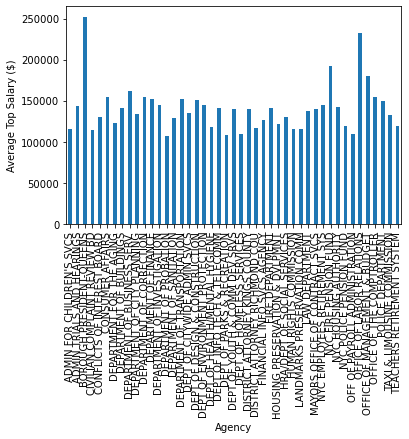

In [24]:
# let's quickly peek at a bar chart of the average salary range to values for each agency
df_to_plot = df[ ['Agency', 'Salary Range To'] ].groupby(by=['Agency']).aggregate({'mean'})
df_to_plot.plot.bar(ylabel='Average Top Salary ($)', legend=False)

Group together all the jobs within the same agency, and add up the number of positions in each agency.

In [25]:
# group jobs at each agency and calculate the sum of # of jobs at each agency
g = df.groupby(df['Agency']).agg({'sum'})
g.head(10)

,# Of Positions,Salary Range To
,sum,sum
Agency,,
ADMIN FOR CHILDREN'S SVCS,9,575461.0
ADMIN TRIALS AND HEARINGS,52,574000.0
BOROUGH PRESIDENT-QUEENS,4,1008660.0
CIVILIAN COMPLAINT REVIEW BD,7,570237.0
CONFLICTS OF INTEREST BOARD,2,260000.0
CONSUMER AFFAIRS,4,620000.0
DEPARTMENT FOR THE AGING,4,490000.0
DEPARTMENT OF BUILDINGS,2,282000.0


A horizontal bar chart that shows the number of open positions within each agency of the NYC government:

<AxesSubplot:ylabel='Agency'>

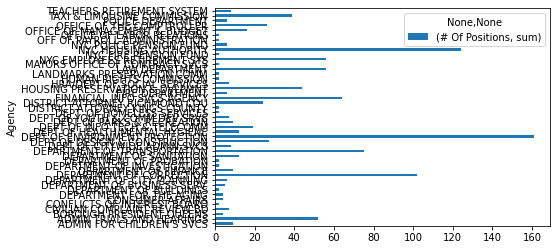

In [26]:
# plot the jobs at each agency
g.plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

A horizontal bar chart that shows the bottom 10 agencies, by number of open positions:
- first we sort the rows by number of positions, in ascending order
- then we grab the first 10 rows, reverse their order, and plot them.

<AxesSubplot:ylabel='Agency'>

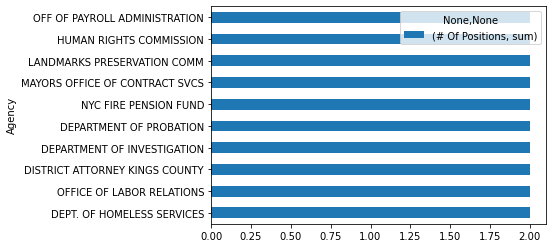

In [27]:
# that is a lot of agencies!
# perhaps limit to just the first few agencies!
g1 = g.sort_values(by=('# Of Positions', 'sum'), ascending=True)
g1[:10][::-1].plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

A horizontal bar chart that shows the top 10 agencies, by number of open positions:
- first we sort the rows by number of positions, in descending order
- then we grab the first 10 rows, reverse their order, and plot them.

<AxesSubplot:ylabel='Agency'>

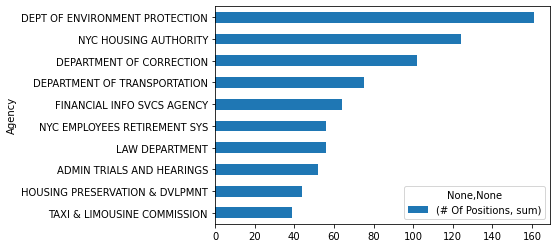

In [28]:
# plot the top agencies by number of positions
g2 = g.sort_values( ('# Of Positions', 'sum'), ascending=False )
g2[ : 10][::-1].plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

A vertical bar chart that shows the bottom 10 agencies, by number of open positions:

<AxesSubplot:xlabel='Agency'>

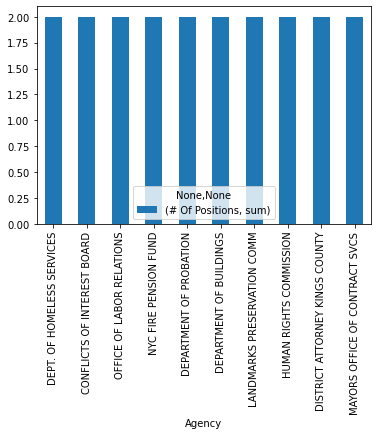

In [29]:
# plot the bottom agencies by number of positions
g2[-10 : ].plot.bar(y=['# Of Positions']) # the index will serve as the x axis, by default

## Pie charts

A pie chart that shows the proportion of available jobs that belong to each agency of NYC government.

<AxesSubplot:ylabel='sum'>

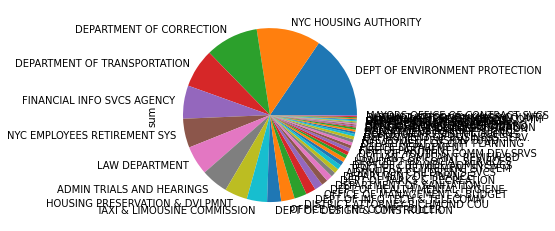

In [30]:
# pie chart of the top 10 agencies, by number of positions over 100k
g2.plot.pie(y='# Of Positions', legend=False)